# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

In [3]:
cities

['bethel',
 'udachny',
 'margaret river',
 'thompson',
 'binh long',
 'haninge',
 'rongelap',
 'stanley',
 'adamstown',
 'college',
 'waitangi',
 'kavieng',
 'hafar al-batin',
 'port-aux-francais',
 'hermanus',
 'ushuaia',
 'grytviken',
 'mount gambier',
 'puerto leguizamo',
 "nar'yan-mar",
 'sandnessjoen',
 'edinburgh of the seven seas',
 'papatowai',
 'amurzet',
 "kapa'a",
 'remire-montjoly',
 'aguadilla',
 'maceio',
 'west island',
 'iqaluit',
 'tralee',
 'elista',
 'tura',
 'bredasdorp',
 'puerto ayora',
 'old orchard beach',
 'mpongwe',
 'vilyuysk',
 'albany',
 'port elizabeth',
 'steinbach',
 'invercargill',
 'sterlibashevo',
 'susuman',
 'huarmey',
 'ilulissat',
 'pisco',
 'belmonte',
 'rio grande',
 'mora',
 'ketchikan',
 'barra do garcas',
 'panevezys',
 'constantia',
 'isafjordur',
 'georgetown',
 'arraial do cabo',
 'blackmans bay',
 'kuruman',
 'iskateley',
 'quellon',
 'tiksi',
 'farafangana',
 'avarua',
 'filey',
 'puerto natales',
 'wajir',
 'warman',
 'badger',
 'namie'

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# # Set the API base URL
# url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# # Define an empty list to fetch the weather data for each city
# city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities[0:10]):
        
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

#     # Create endpoint URL with each city
#     city_url = url + f"&q={city}"
    
#     # Log the url, record, and set numbers
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
#     record_count += 1

#     # Run an API request for each of the cities
#     try:
#         # Parse the JSON and retrieve data
#         city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         city_date = city_weather["dt"]

#         # Append the City information into city_data list
#         city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

#     # If an error is experienced, skip the city
#     except:
#         print("City not found. Skipping...")
#         pass
    
#     # sleep
#     time.sleep(1)
              
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [5]:
rows = []

# loop cities
for city in cities[0:6]:
    
    try:

        # geolocation
        geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}"
        response = requests.get(geo_url)

        if (response.status_code == 200):
            # do work
            geo_data = response.json()

            # get lat, lon, country, name
            if len(geo_data) > 0:
                
                lat = geo_data[0].get("lat", np.nan)
                lon = geo_data[0].get("lon", np.nan)
                country = geo_data[0].get("country", None)
                name = geo_data[0].get("name", None)
                print(lat,lon,name)

        #         print(f"{city} is located at {lat},{lon}")

                if (lat and lon):
                    # weather
                    weather_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial"
                    response2 = requests.get(weather_url)

                    if (response2.status_code == 200):
                        weather_data = response2.json()

                        # extract data
                        temp = weather_data.get("main", {}).get("temp", np.nan)
                        pressure = weather_data.get("main", {}).get("pressure", np.nan)
                        humidity = weather_data.get("main", {}).get("humidity", np.nan)
                        wind_speed = weather_data.get("wind", {}).get("speed", np.nan)
                        cloudiness = weather_data.get("clouds", {}).get("all", np.nan)
                        date = wind_speed = weather_data.get("dt", np.nan)
                        temp_max=weather_data.get("main", {}).get("temp_max", np.nan)
                       
                        print(wind_speed)
                        print(weather_data)
                        print(weather_data['wind']["speed"])
                        # build row
                        row = {"city": name,
                               "country": country,
                               "latitude": lat,
                               "longitude": lon,
                               "temperature": temp,
                               "pressure": pressure,
                               "humidity": humidity,
                               "wind_speed": weather_data.get("wind", {}).get("speed", np.nan),
                              "cloudiness": cloudiness,
                              "Max_Temp": temp_max, 
                              "date": date}

            #             print(row)
                        rows.append(row)

#                     else:
#                         print(f"Getting Weather Data failed with status code: {response2.status_code}. More info below:")
#                         print(weather_data)
#                 else:
#                     print("failed to extract lat and lon from response")
#                     print(geo_data)
#             else:
#                 print(f"did not find any geolocation data for city: {city}")
#         else:
#             print(f"Getting geolocation data failed with status code: {response.status_code}. More info below:")
#             print(geo_data)
    except Exception as e:
        print(f"Something went terribly wrong for {city}")
        print(e)
    
    # sleep 
    print(f"{city} was processed successfully.")
    time.sleep(1)

60.7922222 -161.7558333 Bethel
1685056969
{'coord': {'lon': -161.7558, 'lat': 60.7922}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.54, 'feels_like': 54.93, 'temp_min': 55.44, 'temp_max': 57.54, 'pressure': 1002, 'humidity': 41}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 90}, 'clouds': {'all': 75}, 'dt': 1685056969, 'sys': {'type': 1, 'id': 7640, 'country': 'US', 'sunrise': 1685022043, 'sunset': 1685087252}, 'timezone': -28800, 'id': 5880568, 'name': 'Bethel', 'cod': 200}
9.22
bethel was processed successfully.
66.411768 112.2517294 Udachny
1685057496
{'coord': {'lon': 112.2517, 'lat': 66.4118}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 33.8, 'feels_like': 27.66, 'temp_min': 33.8, 'temp_max': 33.8, 'pressure': 1023, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 280, 'gust': 0}, 'cloud

In [6]:
type( weather_data.get("wind", {}).get("speed", np.nan))

float

In [7]:
type(wind_speed)

int

In [8]:
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(rows)}")

Number of cities in the list: 6


In [9]:
df = pd.DataFrame(rows)
df

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,Max_Temp,date
0,Bethel,US,60.792222,-161.755833,57.54,1002,41,9.22,75,57.54,1685056969
1,Udachny,RU,66.411768,112.251729,33.80,1023,59,7.00,97,33.80,1685057496
2,Margaret River,AU,-33.953178,115.076937,47.17,1036,77,6.38,0,47.17,1685057498
3,Thompson,CA,55.743347,-97.863464,55.58,1016,100,3.44,100,55.58,1685057500
4,Bình Long Town,VN,11.651175,106.607079,81.00,1010,77,5.28,74,81.00,1685057502
5,Haninge kommun,SE,59.049722,18.266667,48.58,1016,85,13.35,56,49.44,1685057504


In [10]:
# Show Record Count
df.count()

city           6
country        6
latitude       6
longitude      6
temperature    6
pressure       6
humidity       6
wind_speed     6
cloudiness     6
Max_Temp       6
date           6
dtype: int64

In [11]:
# Display sample data
df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,Max_Temp,date
0,Bethel,US,60.792222,-161.755833,57.54,1002,41,9.22,75,57.54,1685056969
1,Udachny,RU,66.411768,112.251729,33.80,1023,59,7.00,97,33.80,1685057496
2,Margaret River,AU,-33.953178,115.076937,47.17,1036,77,6.38,0,47.17,1685057498
3,Thompson,CA,55.743347,-97.863464,55.58,1016,100,3.44,100,55.58,1685057500
4,Bình Long Town,VN,11.651175,106.607079,81.00,1010,77,5.28,74,81.00,1685057502


In [12]:
# Export the City_Data into a csv
df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,Max_Temp,date
City_ID,,,,,,,,,,,
0,Bethel,US,60.792222,-161.755833,57.54,1002,41,9.22,75,57.54,1685056969
1,Udachny,RU,66.411768,112.251729,33.80,1023,59,7.00,97,33.80,1685057496
2,Margaret River,AU,-33.953178,115.076937,47.17,1036,77,6.38,0,47.17,1685057498
3,Thompson,CA,55.743347,-97.863464,55.58,1016,100,3.44,100,55.58,1685057500
4,Bình Long Town,VN,11.651175,106.607079,81.00,1010,77,5.28,74,81.00,1685057502


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

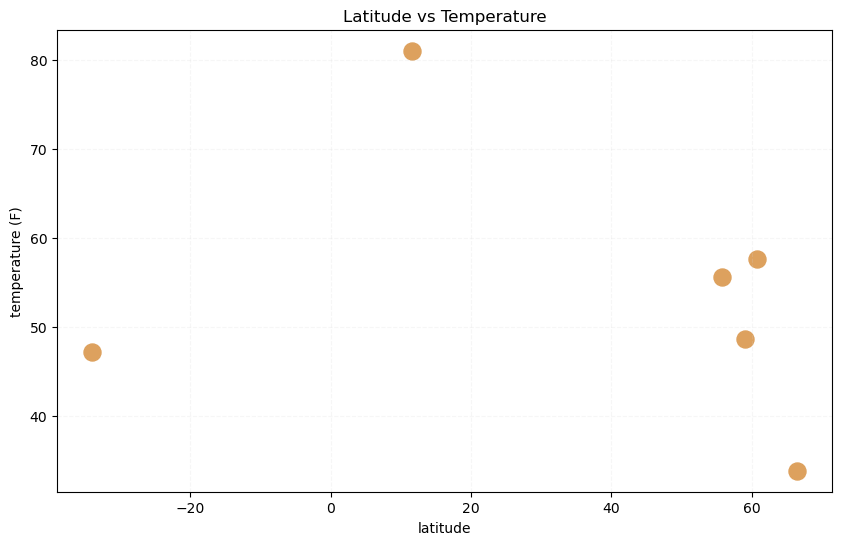

<Figure size 640x480 with 0 Axes>

In [14]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
# plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.temperature, color="#dda15e", s=150)
plt.xlabel("latitude")
plt.ylabel("temperature (F)")
plt.title("Latitude vs Temperature")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1.png")

#### Latitude Vs. Humidity

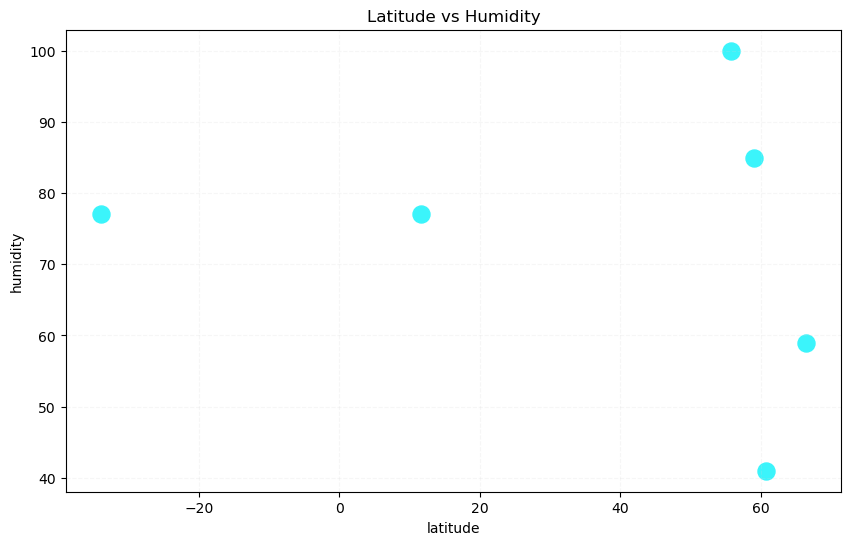

<Figure size 640x480 with 0 Axes>

In [15]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig2.png")

# # Show plot
# plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.humidity, color="#3BF4FB", s=150)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title("Latitude vs Humidity")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# # Save the figure
plt.savefig("../output_data/Fig2.png")

#### Latitude Vs. Cloudiness

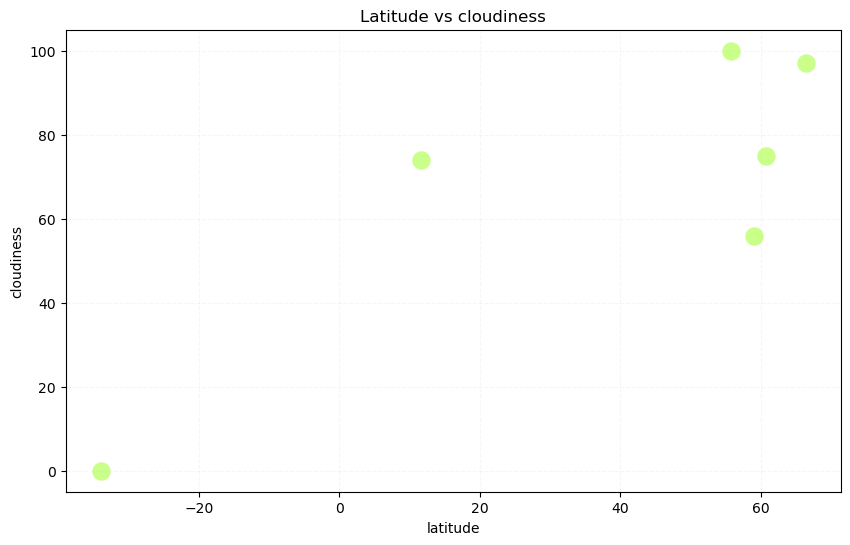

<Figure size 640x480 with 0 Axes>

In [16]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig3.png")

# # Show plot
# plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.cloudiness, color="#CAFF8A", s=150)
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.title("Latitude vs cloudiness")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# # # Save the figure
plt.savefig("../output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

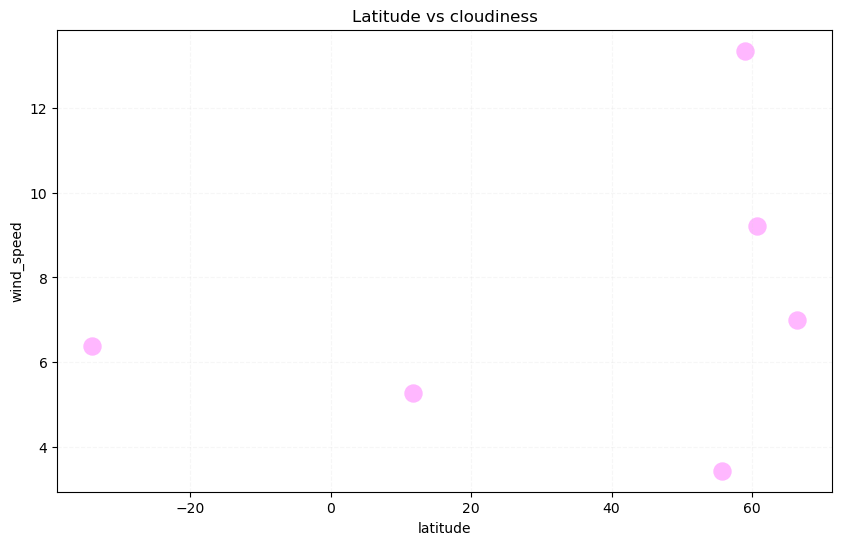

<Figure size 640x480 with 0 Axes>

In [17]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig4.png")

# # Show plot
# plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.wind_speed, color="#FFB7FF", s=150)
plt.xlabel("latitude")
plt.ylabel("wind_speed")
plt.title("Latitude vs cloudiness")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# # # Save the figure
plt.savefig("../output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.latitude >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,Max_Temp,date
0,Bethel,US,60.792222,-161.755833,57.54,1002,41,9.22,75,57.54,1685056969
1,Udachny,RU,66.411768,112.251729,33.80,1023,59,7.00,97,33.80,1685057496
2,Thompson,CA,55.743347,-97.863464,55.58,1016,100,3.44,100,55.58,1685057500
3,Bình Long Town,VN,11.651175,106.607079,81.00,1010,77,5.28,74,81.00,1685057502
4,Haninge kommun,SE,59.049722,18.266667,48.58,1016,85,13.35,56,49.44,1685057504


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.latitude < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,Max_Temp,date
0,Margaret River,AU,-33.953178,115.076937,47.17,1036,77,6.38,0,47.17,1685057498


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8168755277966248


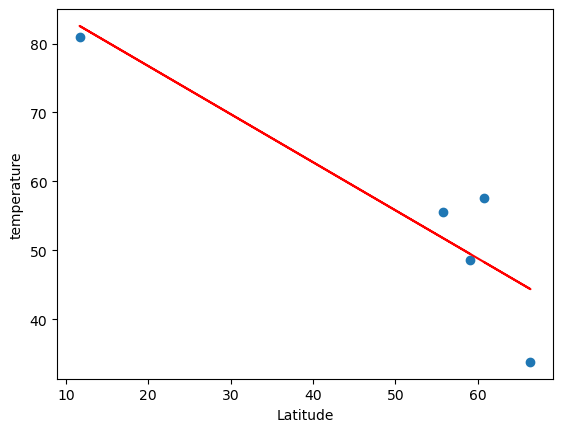

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["temperature"]
plot_linear_regression(x_values, y_values, "temperature",(6,-10))

In [22]:
# RElationship of linear regression Temp vs Lattitude Northern hemisphere 
# The regression reflects the hight the latitude coordinate the tempature will rise 

C:\Users\jenni\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\jenni\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\jenni\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The r-value is: 0.0


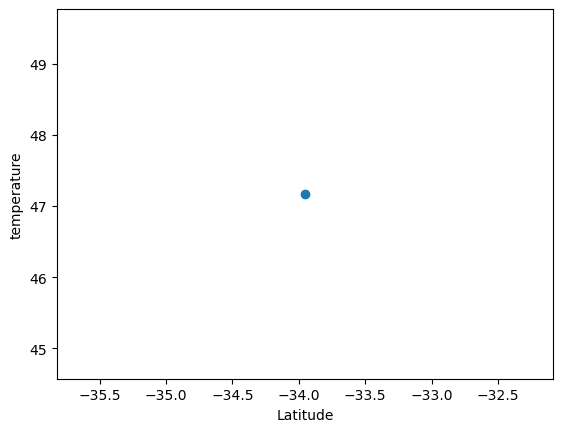

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["temperature"]
plot_linear_regression(x_values, y_values, "temperature",(6,-10))

In [24]:
# RElationship of linear regression Temp vs Lattitude Southern hemisphere 
# The regression reflects the lower the latitude coordinate the tempature will fall

In [25]:
import statsmodels.api as sm

In [26]:
X = northern_hemi_df["latitude"]
y = northern_hemi_df["temperature"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     13.38
Date:                Thu, 25 May 2023   Prob (F-statistic):             0.0353
Time:                        18:31:51   Log-Likelihood:                -16.495
No. Observations:                   5   AIC:                             36.99
Df Residuals:                       3   BIC:                             36.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.6917     10.388      8.730      0.0

C:\Users\jenni\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


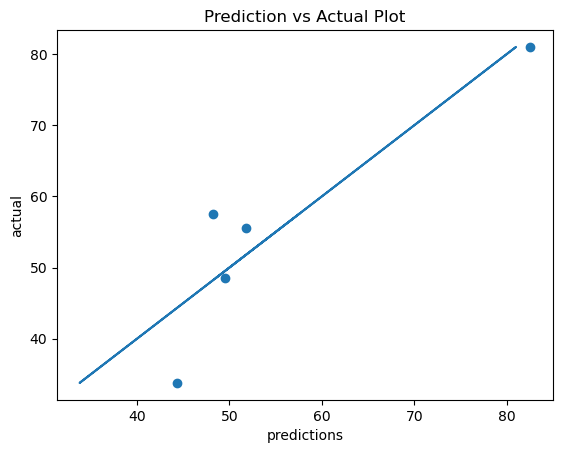

In [27]:
plt.scatter(predictions, y)
plt.xlabel("predictions")
plt.ylabel("actual")
plt.title("Prediction vs Actual Plot")
plt.plot(y, y)
plt.show()

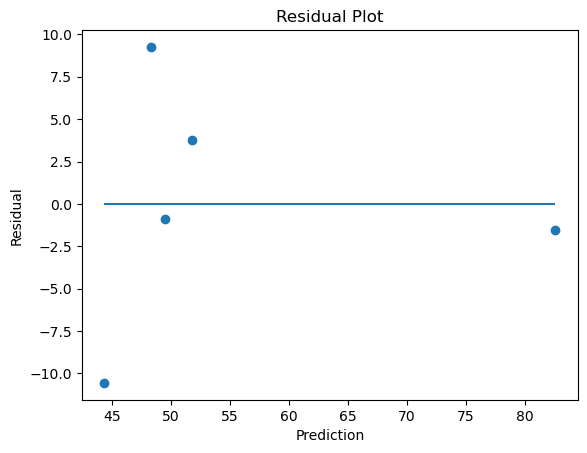

In [28]:
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.hlines(0, min(predictions), max(predictions))
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [29]:
#The lower the latitude coordinate in the southern hemisphere the less humidity and in the northern hemisphere as the latitude 
#coordinate increases the humidity

C:\Users\jenni\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\jenni\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\jenni\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The r-value is: 0.0


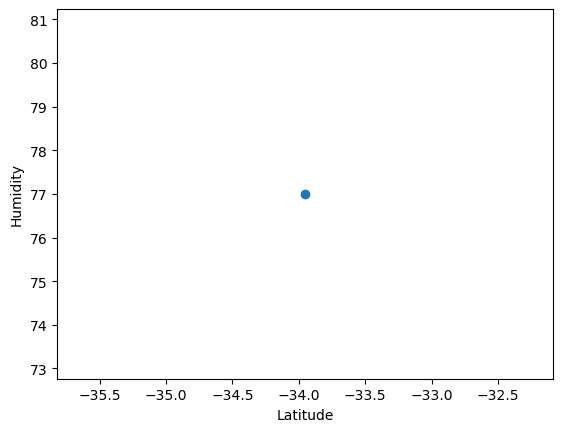

In [30]:
# southern Hemisphere 
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))

The r-value is: 0.05159833891040082


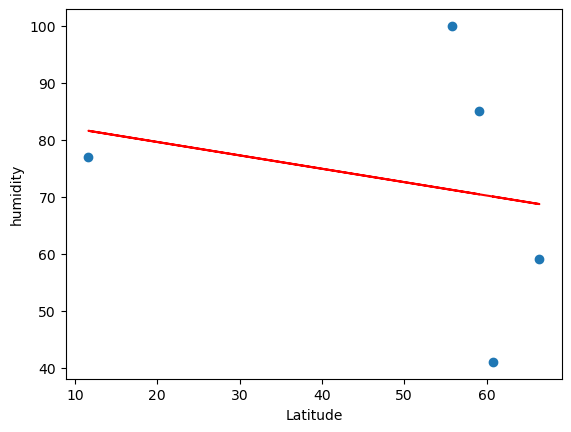

In [31]:
#Northern Hemisphere 
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["humidity"]
plot_linear_regression(x_values, y_values, "humidity",(6,-10))

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0


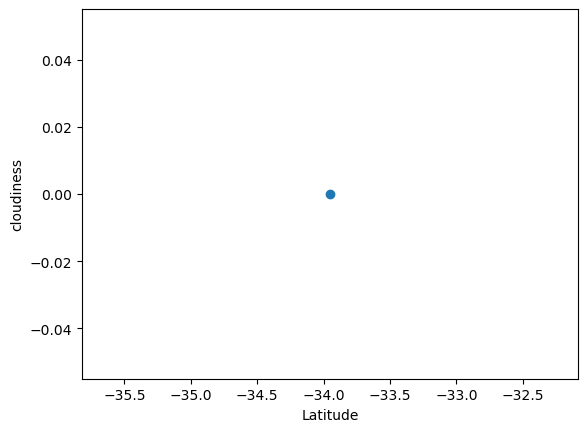

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, "cloudiness",(6,-10))

The r-value is: 0.047316839690244146


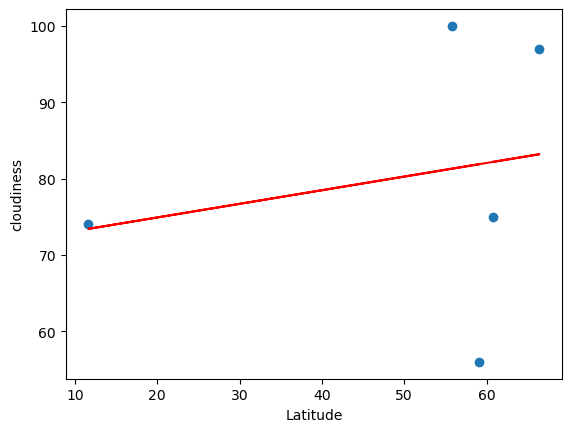

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, "cloudiness",(6,-10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [34]:
# as the latitude in the northern hemisphere increases the cloudiness decreases 
# in the southern hemisphere as the latitude decreases the cloudiness increases 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0


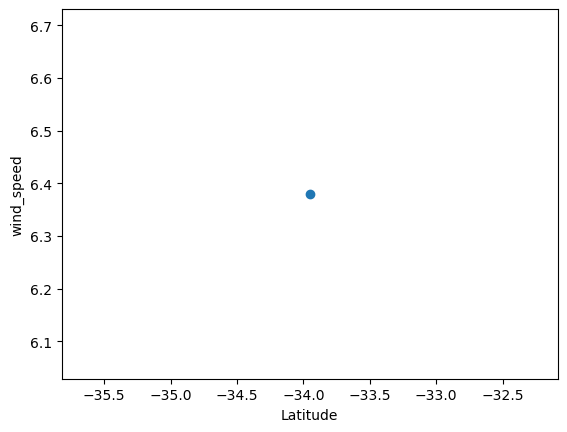

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["wind_speed"]
plot_linear_regression(x_values, y_values, "wind_speed",(6,-10))

The r-value is: 0.13417008526781085


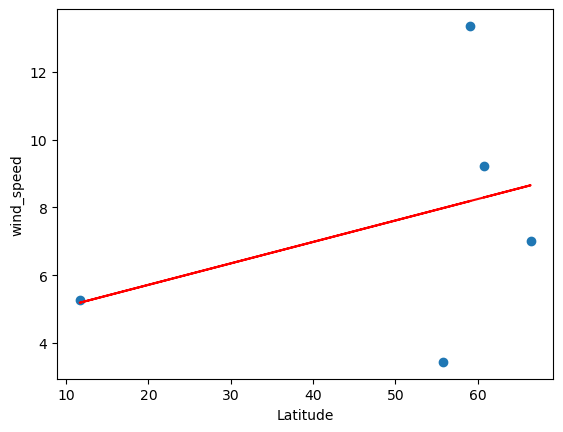

In [36]:
# Northhern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["wind_speed"]
plot_linear_regression(x_values, y_values, "wind_speed",(6,-10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [37]:
# in the northernhemisphere as the latitude coordinate increases the windspeed decreases 
# in the Southernhemisphere as the latitude coordinate decreases the windspeed increases 